PST x3 COD - Total
PST x3 BOD - Total Carbonaceous
PST x3 N - Total Kjeldahl Nitrogen
PST x3 P - Total P
PST x3 pH
PST x3 Total suspended solids
PST x3 Volatile suspended solids
PST x3 Element HRT
PST x3 Gas - Dissolved oxygen
PST x3 P - Soluble phosphate
PST x3 N - Ammonia
PST x3 N - Nitrate
PST x3 N - Nitrite
PST x3 Alkalinity
PST x3 Flow
ML Recycle COD - Total
ML Recycle BOD - Total Carbonaceous
ML Recycle N - Total Kjeldahl Nitrogen
ML Recycle N - Total Kjeldahl Nitrogen (U)
ML Recycle P - Total P
ML Recycle pH
ML Recycle Total suspended solids
ML Recycle Volatile suspended solids
ML Recycle Gas - Dissolved oxygen
ML Recycle P - Soluble phosphate
ML Recycle N - Ammonia
ML Recycle N - Ammonia (U)
ML Recycle N - Nitrate
ML Recycle N - Nitrite
ML Recycle Alkalinity
ML Recycle Flow
ML Recycle Flow (S)
FST x5 COD - Total
FST x5 BOD - Total Carbonaceous
FST x5 N - Total Kjeldahl Nitrogen
FST x5 P - Total P
FST x5 pH
FST x5 Total suspended solids
FST x5 Total suspended solids (U)
FST x5 V

[Text(0, 0.5, 'Value'), Text(0.5, 0, 'Time Unit')]

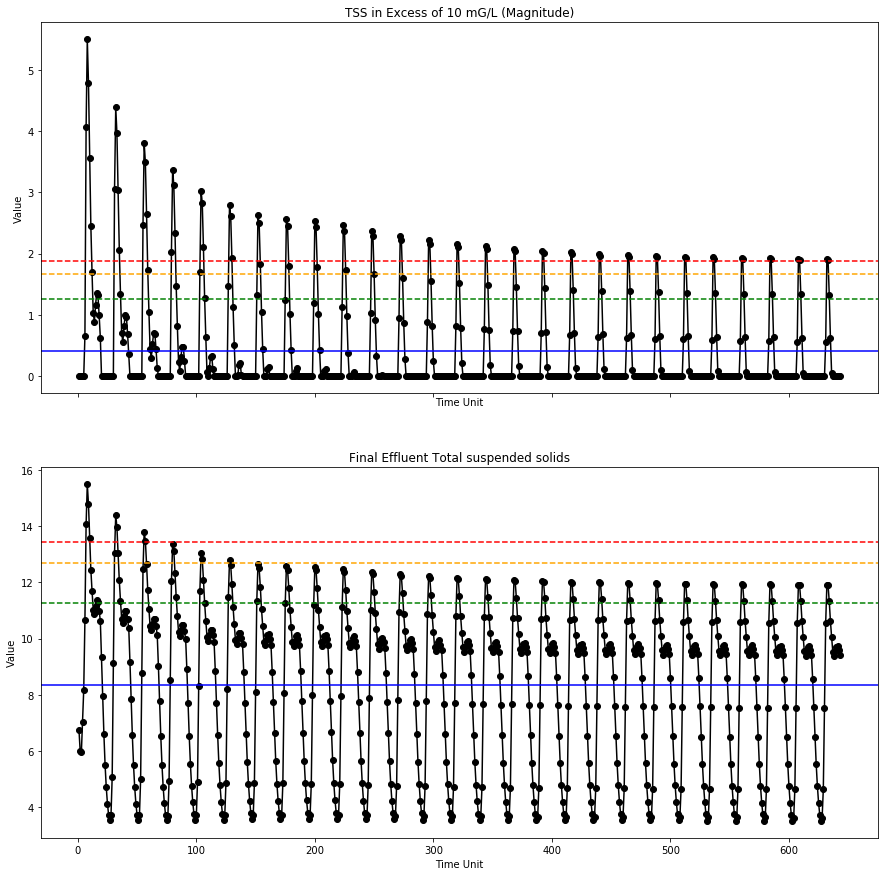

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

in_csv = pd.read_csv(r'/Users/aya/Local Documents/NYU/Dissertation/data/BIOWIN_database/1_Datasets/Monthly/normal-28days.csv')
len(in_csv.columns)

for i in in_csv.columns[15:]:
    print(i)
for i in in_csv.columns[0:14]:
    print(i)

x = in_csv['Final Effluent Total suspended solids']
x.rename(columns = {'Final Effluent Total suspended solids':'mR'}, inplace = True)

#everything in the dataset before index 30 is unbalanced data.
lhs = 30

x[lhs:60]
max(x[lhs:])

# Define list variable for moving ranges
MR = [np.nan]

# Get and append moving ranges
i = 1
for data in range(1, len(x)):
    if x[i] >= 10:
        MR.append(x[i] - 10)
    if x[i] < 10:
        MR.append(0)
    i += 1

MR[lhs:60]
MR = np.clip(MR, 0, 1000)
# Convert list to pandas Series objects
MR = pd.Series(MR)

# Concatenate mR Series with and rename columns
data = pd.concat([x,MR], axis=1).rename(columns={0:"x", 1:"mR"})

# Add a risk tag column
data['tagS'] = np.nan
data['tagF'] = np.nan

# Plot x and mR charts
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)

x1 = np.linspace(1, len(data['x'][lhs:]), len(data['x'][lhs:]), endpoint=True)

x2 = np.linspace(1, len(data['mR'][lhs:]), len(data['mR'][lhs:]), endpoint=True)

# pSTD chart (p - population)
axs[1].plot(x1, data['x'][lhs:], linestyle='-', marker='o', color='black')
axs[1].axhline(statistics.mean(data['x'][lhs:]), color='blue')
axs[1].axhline(statistics.mean(data['x'][lhs:])+1*statistics.pstdev(data['x'][lhs:len(data['x'])]), color = 'green', linestyle = 'dashed')
axs[1].axhline(statistics.mean(data['x'][lhs:])+1.5*statistics.pstdev(data['x'][lhs:len(data['x'])]), color = 'orange', linestyle = 'dashed')
axs[1].axhline(statistics.mean(data['x'][lhs:])+1.75*statistics.pstdev(data['x'][lhs:len(data['x'])]), color = 'red', linestyle = 'dashed')
#axs[1].axhline(statistics.mean(data['x'])-3*statistics.pstdev(data['x'][1:len(data['x'])]), color = 'red', linestyle = 'dashed')
axs[1].set_title('Final Effluent Total suspended solids')
axs[1].set(xlabel='Time Unit', ylabel='Value')

# pSTD chart 2 (p - population)
axs[0].plot(x2, data['mR'][lhs:], linestyle='-', marker='o', color='black')
axs[0].axhline(statistics.mean(data['mR'][lhs:]), color='blue')
axs[0].axhline(statistics.mean(data['mR'][lhs:])+1*statistics.pstdev(data['mR'][lhs:len(data['mR'])]), color = 'green', linestyle = 'dashed')
axs[0].axhline(statistics.mean(data['mR'][lhs:])+1.5*statistics.pstdev(data['mR'][lhs:len(data['mR'])]), color = 'orange', linestyle = 'dashed')
axs[0].axhline(statistics.mean(data['mR'][lhs:])+1.75*statistics.pstdev(data['mR'][lhs:len(data['mR'])]), color = 'red', linestyle = 'dashed')

axs[0].set_title('TSS in Excess of 10 mG/L (Magnitude)')
axs[0].set(xlabel='Time Unit', ylabel='Value')



All data points tagged.


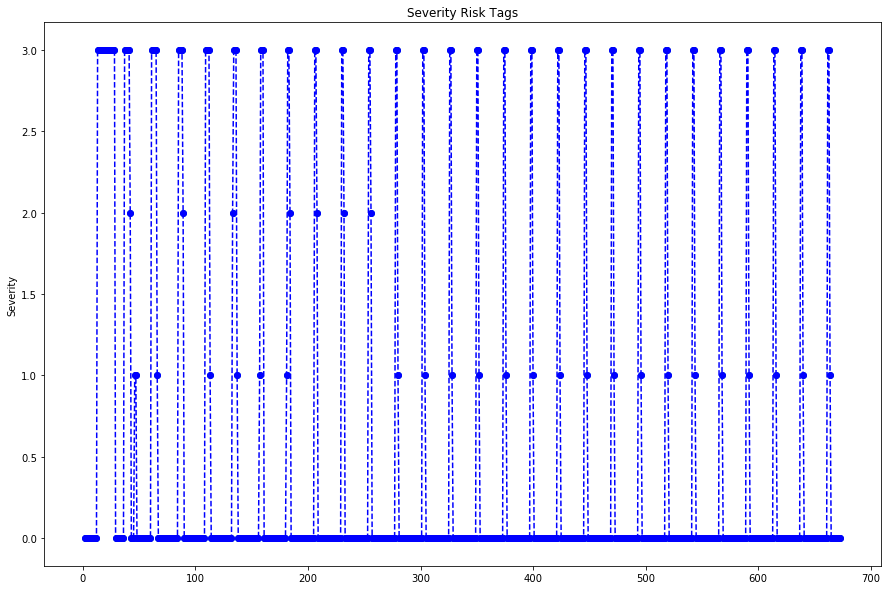

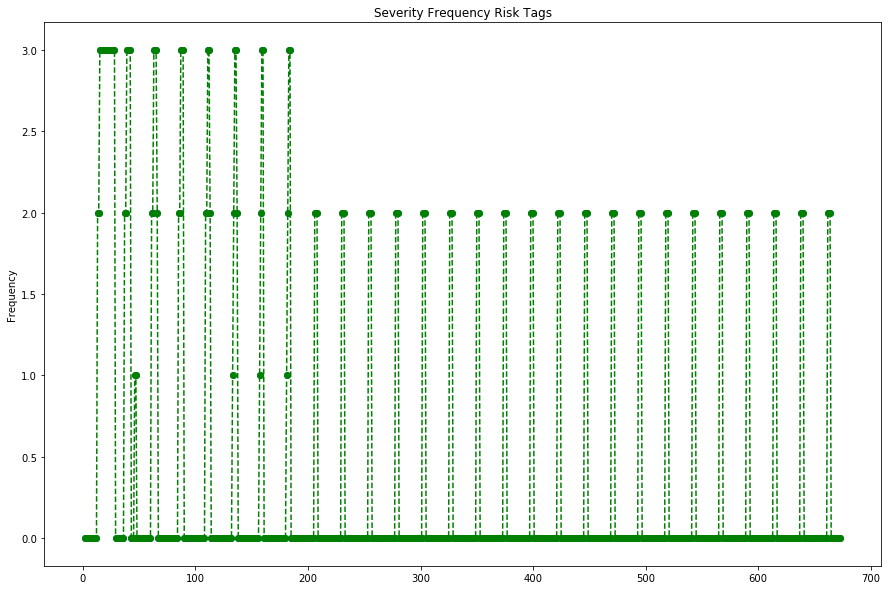

In [3]:
#tag data out of range
#this is the Severity
i = 0
control = True
for unit in data['mR']:
    if unit < statistics.mean(data['mR'][lhs:len(data['mR'])])+statistics.pstdev(data['mR'][lhs:len(data['mR'])]):
        data['tagS'][i] = 0
        control = False
    if unit > statistics.mean(data['mR'][lhs:len(data['mR'])])+statistics.pstdev(data['mR'][lhs:len(data['mR'])]):
        data['tagS'][i] = 1
        control = False
    if unit > statistics.mean(data['mR'][lhs:len(data['mR'])])+1.5*statistics.pstdev(data['mR'][lhs:len(data['mR'])]):
        data['tagS'][i] = 2
        control = False
    if unit > statistics.mean(data['mR'][lhs:len(data['mR'])])+1.75*statistics.pstdev(data['mR'][lhs:len(data['mR'])]):
        data['tagS'][i] = 3
        control = False
    i += 1
    if control == True:
        print('All data points tagged.')

#filter probably needs to move left to right (i.e. low to high risk)
#this is the Frequency
#this is the Final Tage for Training
i = 0
for unit in data['tagS']:
    if data['tagS'][i] == 3 and data['tagS'][i - 1] <= 1:
        data['tagF'][i] = 2
    if data['tagS'][i] == 3 and data['tagS'][i - 1] >= 1:
        data['tagF'][i] = 2
    if data['tagS'][i] == 3 and data['tagS'][i - 1] >= 1 and data['tagS'][i - 2] >= 1:
        data['tagF'][i] = 3
    if data['tagS'][i] == 3 and data['tagS'][i - 1] >= 1 and data['tagS'][i - 2] >= 1 and data['tagS'][i - 3] >= 1:
        data['tagF'][i] = 3

    if data['tagS'][i] == 2 and data['tagS'][i - 1] <= 1:
        data['tagF'][i] = 1
    if data['tagS'][i] == 2 and data['tagS'][i - 1] >= 1 and data['tagS'][i - 2] >= 1:
        data['tagF'][i] = 2
    if data['tagS'][i] == 2 and data['tagS'][i - 1] >= 1 and data['tagS'][i - 2] >= 1 and data['tagS'][i - 3] >= 1:
        data['tagF'][i] = 3

    if data['tagS'][i] == 1 and data['tagS'][i - 1] == 0:
        data['tagF'][i] = 0
    if data['tagS'][i] == 1 and data['tagS'][i - 1] <= 1:
        data['tagF'][i] = 1
    if data['tagS'][i] == 1 and data['tagS'][i - 1] >= 1 and data['tagS'][i - 2] >= 1:
        data['tagF'][i] = 2
    if data['tagS'][i] == 1 and data['tagS'][i - 1] >= 1 and data['tagS'][i - 2] >= 1 and data['tagS'][i - 3] >= 1:
        data['tagF'][i] = 2

    if data['tagS'][i] == 0:
        data['tagF'][i] = 0
    i += 1

data[:10]

data[30:50]

data[230:260]

#data.to_csv('/Users/aya/Documents/NYU/Dissertation/data/BIOWIN_database/1_Datasets/Preprocessed/Ff-28days-final.csv')

def data_plotter(x, y, c, ylabel, title):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size

    fig, ax1 = plt.subplots()

    ax1.plot(x, y, marker = 'o', color = c, linestyle = '--')

    ax1.set_ylabel(ylabel)
    ax1.set_title(title)
    plt.scatter(y=y, x=x)
x3 = np.linspace(1, len(data['mR']), len(data['mR']), endpoint=True)

data_plotter(x3, data['tagS'], c = 'blue', ylabel = 'Severity', title = 'Severity Risk Tags')

data_plotter(x3, data['tagF'], c = 'green', ylabel = 'Frequency', title = 'Severity Frequency Risk Tags')
